In [1]:
!pip install pandas numpy seaborn matplotlib textblob wordcloud


  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)
Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl (301 kB)


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud

In [7]:
# Load the dataset
file_path = "E:\\INTERN\\Prodigy InfoTech\\Task 4\\twitter_training.csv"
df = pd.read_csv(file_path, header=None)



In [9]:
# Inspect the dataset
df.head()



,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [11]:
# Assign proper column names (based on Kaggle dataset structure)
df.columns = ["ID", "Entity", "Sentiment", "Tweet"]



In [13]:
# Drop unnecessary columns
df = df[["Sentiment", "Tweet"]]

# Check for missing values
df.isnull().sum()

# Drop missing values if any
df.dropna(inplace=True)



C:\Users\omtal\AppData\Local\Temp\ipykernel_11448\2115406017.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


C:\Users\omtal\AppData\Local\Temp\ipykernel_11448\4084868801.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sentiment", palette="coolwarm")


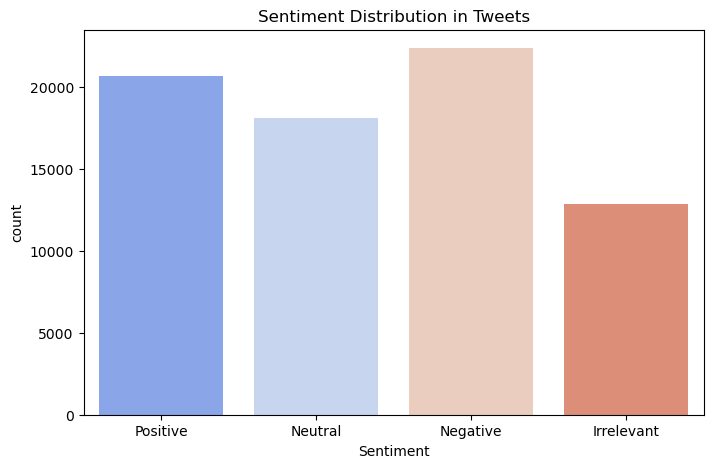

In [21]:
# Basic sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Sentiment", palette="coolwarm")
plt.title("Sentiment Distribution in Tweets")
plt.show()



C:\Users\omtal\AppData\Local\Temp\ipykernel_11448\4002762734.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sentiment_Score"] = df["Tweet"].apply(get_sentiment_score)


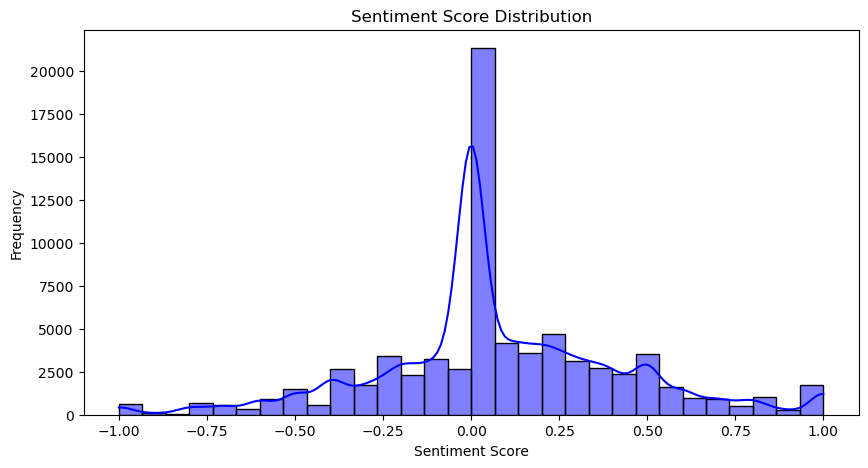

In [18]:
# Sentiment Analysis using TextBlob
def get_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

df["Sentiment_Score"] = df["Tweet"].apply(get_sentiment_score)

# Visualizing Sentiment Score Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Sentiment_Score"], bins=30, kde=True, color="blue")
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()



In [25]:
# WordCloud for Positive and Negative Sentiments
positive_tweets = " ".join(df[df["Sentiment"] == "Positive"]["Tweet"])
negative_tweets = " ".join(df[df["Sentiment"] == "Negative"]["Tweet"])



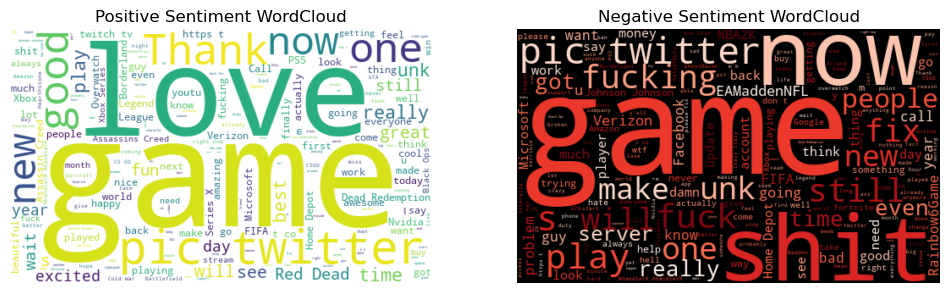

In [27]:
# Generate WordClouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=500, height=300, background_color="white").generate(positive_tweets)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Sentiment WordCloud")

plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=500, height=300, background_color="black", colormap="Reds").generate(negative_tweets)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Sentiment WordCloud")

plt.show()
